<b>Factor Analysis (FA) is a statistical technique used for identifying underlying relationships between observed variables. It is a dimensionality reduction method that aims to explain the observed correlations between variables in terms of a smaller number of unobservable latent variables called factors. These factors are assumed to represent the common variance shared among the observed variables.</b>

<b>Here are the key concepts and steps involved in Factor Analysis:</b>

<b>Observed Variables (Manifest Variables): </b>

*   These are the variables that are directly measured or observed. Factor
    Analysis assumes that these observed variables are influenced by some underlying latent factors.

<b>Latent Factors: </b>

*  These are unobservable variables that are hypothesized to explain the
    observed correlations among the variables. Each latent factor is associated with a subset of observed variables.

<b>Factor Loading: </b>

*  The factor loading represents the strength and direction of the relationship
   between an observed variable and a latent factor. It indicates how much of the variation in the observed variable is explained by the underlying factor.

<b>Eigenvalues and Explained Variance: </b>

*  In Factor Analysis, eigenvalues are used to determine the number of factors
   to retain. Eigenvalues represent the amount of variance explained by each factor. Factors with eigenvalues greater than 1 are typically retained.

<b>Rotation: </b>

*  Factor rotation is often applied to make the factors more interpretable.
   Common rotation methods include Varimax and Promax, which aim to simplify the factor structure.

<b>Communality: </b>

*  Communality represents the proportion of variance in an observed variable
   that is accounted for by the factors. Higher communality values indicate that a larger proportion of the variable's variance is explained by the factors.

*Factor Analysis is widely used in various fields, including psychology, sociology, economics, and marketing, to identify latent constructs that influence observed variables. It helps in understanding the underlying structure of the data and can be used for dimensionality reduction, simplifying the interpretation of complex datasets.*



## Load the breast cancer dataset from sklearn

In [2]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 994.1 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 27.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=21d9c7b95b8244625a0e9306519acc301fd419c462bc006ec8314794f7153055
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import FastICA
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt

cancer = load_breast_cancer()

In [4]:
data = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data['Target'] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Seperate the input (x) and output features (y)

In [6]:
x = data.drop(['Target'],axis=1)
y = data['Target']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [7]:
x.shape

(569, 30)

## Perform factor analysis

In [8]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(x)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

## Get the loadings

In [9]:
loadings=fa.loadings_

## Eigen values and Eigen vectors

In [12]:
ev,v=fa.get_eigenvalues()
ev

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

## Scree plot

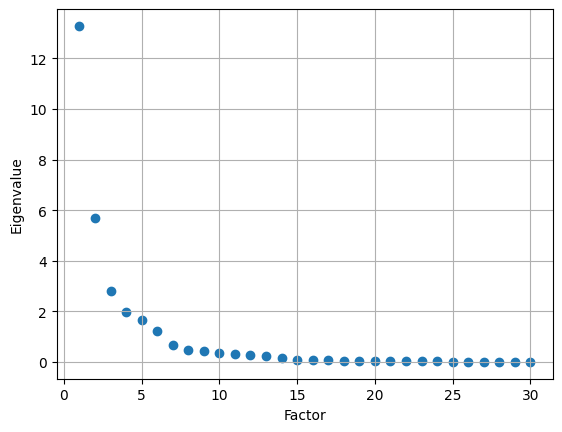

In [24]:
xvals=range(1, x.shape[1]+1)
plt.scatter(xvals, ev)
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [25]:
loadings

array([[ 0.95562635,  0.05645063, -0.0142871 , -0.16838242,  0.10176231,
         0.01881145],
       [ 0.25551178,  0.07868244, -0.02615352,  0.09621101,  0.86022166,
         0.00669474],
       [ 0.95533403,  0.09743939,  0.01663971, -0.15844249,  0.10348388,
         0.03525553],
       [ 0.97098932,  0.05334949, -0.00713118, -0.09186676,  0.08851425,
         0.0043484 ],
       [ 0.20299621,  0.1808786 ,  0.80916182,  0.21279554, -0.10093823,
         0.17165656],
       [ 0.4727578 ,  0.60198222,  0.49024457, -0.02079705,  0.07925024,
         0.26982724],
       [ 0.65836139,  0.58816111,  0.31055335, -0.01357894,  0.11196566,
         0.17256882],
       [ 0.81090082,  0.34017498,  0.3484974 , -0.01752727,  0.07762906,
         0.14917648],
       [ 0.16454969,  0.2809068 ,  0.36498856,  0.19374545, -0.01711403,
         0.60478664],
       [-0.29497095,  0.57955613,  0.5564854 ,  0.2128117 , -0.06623561,
         0.19097449],
       [ 0.81727362,  0.15915534,  0.04617073,  0.